In [29]:
# Import required modules
import cv2
import numpy as np
import os
import glob
import json
from matplotlib import pyplot as plt

In [30]:
# Define the dimensions of checkerboard
CHECKERBOARD = (7, 7)
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS + 
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [31]:
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [32]:
# Extracting path of individual image stored in a given directory
# images = glob.glob('E:/Major_project_main/camera_callibration/for_callibration_canon/*.JPG')
images = glob.glob('E:/Major_project_main/Main/image_for_callibration_canon/*.JPG')
images

['E:/Major_project_main/Main/image_for_callibration_canon\\1.JPG',
 'E:/Major_project_main/Main/image_for_callibration_canon\\2.JPG',
 'E:/Major_project_main/Main/image_for_callibration_canon\\3.JPG',
 'E:/Major_project_main/Main/image_for_callibration_canon\\4.JPG',
 'E:/Major_project_main/Main/image_for_callibration_canon\\5.JPG',
 'E:/Major_project_main/Main/image_for_callibration_canon\\6.JPG']

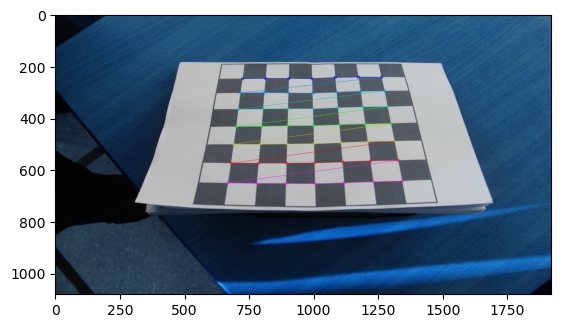

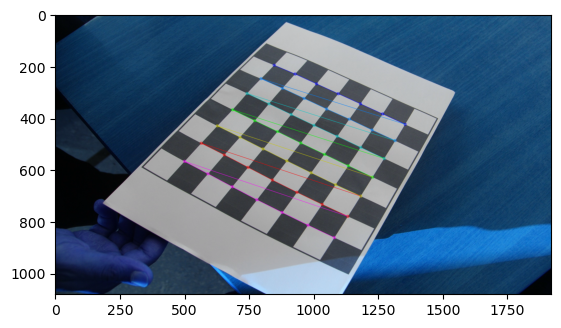

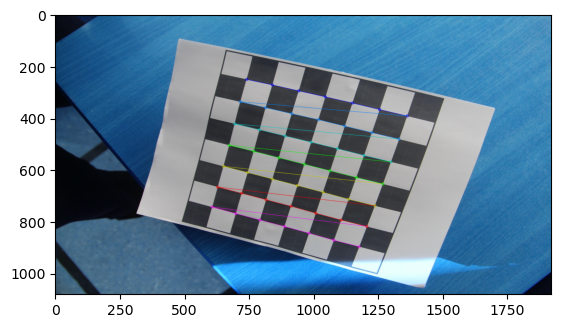

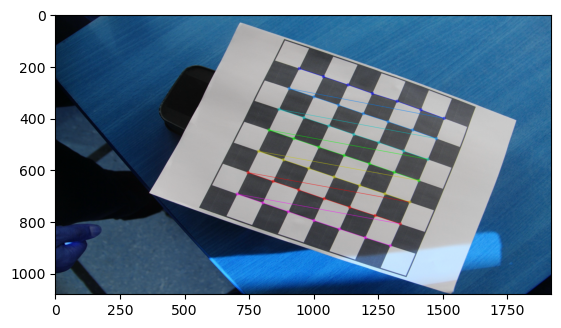

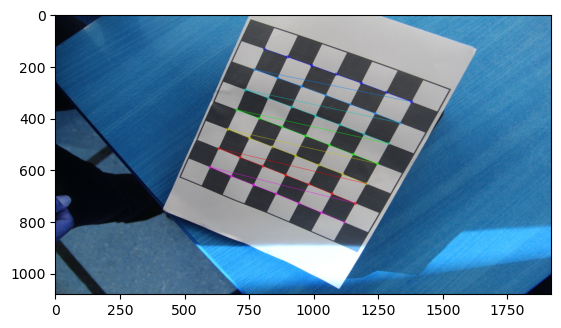

In [33]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
        plt.imshow(img)
        plt.show()


In [34]:
h,w = img.shape[:2]
 
"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[1.63775920e+03 0.00000000e+00 9.24779153e+02]
 [0.00000000e+00 1.38603680e+03 4.46298754e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-0.15830414  0.0553174  -0.0076963  -0.00507918 -0.16228404]]
rvecs : 

(array([[-0.65171161],
       [ 0.04349134],
       [-0.00614759]]), array([[-0.48915782],
       [ 0.04041875],
       [ 0.54001818]]), array([[0.12322516],
       [0.18546561],
       [0.2635731 ]]), array([[-0.16008306],
       [ 0.02785756],
       [ 0.38381202]]), array([[0.14215568],
       [0.18620433],
       [0.40920893]]))
tvecs : 

(array([[-2.22223457],
       [-2.54883324],
       [18.19172431]]), array([[-0.81554063],
       [-3.14364404],
       [17.29726964]]), array([[-1.73306442],
       [-2.18409544],
       [15.58162627]]), array([[ 0.19607729],
       [-2.74170059],
       [16.10043831]]), array([[-1.12516121],
       [-3.65512804],
       [16.09903208]]))


In [21]:
[tvec.tolist() for tvec in tvecs]

[[[-16.17136895063924], [-17.25232752981968], [36.75012832189439]],
 [[-14.317083410649042], [-17.24419894854093], [35.68876023082052]],
 [[-14.132921594140626], [-15.399304904266412], [32.9276613346674]],
 [[-12.5850747617768], [-16.077408138395786], [33.88210110841258]],
 [[-13.893838356634161], [-16.92959804604033], [33.55091564290819]],
 [[-1.5750148999563829], [-4.81648325455606], [16.307765566030277]],
 [[-0.20662666232147556], [-5.284190345900296], [15.451827919911889]]]

In [17]:
# create dictionaries to store camera parameters
intrinsic_params = {
    'fx': mtx[0, 0],
    'fy': mtx[1, 1],
    'ox': mtx[0, 2],
    'oy': mtx[1, 2],
    'distortion': dist.tolist()
}

extrinsic_params = {
    'rvecs': [rvec.tolist() for rvec in rvecs],
    'tvecs': [tvec.tolist() for tvec in tvecs]
}

# combine intrinsic and extrinsic parameters into a single dictionary
camera_params = {
    'intrinsic': intrinsic_params,
    'extrinsic': extrinsic_params
}

# dump dictionary into formatted JSON file
with open('camera_params_re.json', 'w') as f:
    json.dump(camera_params, f, indent=4)